In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

# 2. Introducción

# 3. Principio del Máximo

# 4. Planteamiento del Problema

# 5. El método numérico

## e)

################

## f)

\begin{equation}
A_h u_h(x,y) = 
\underbrace{-\frac{a(x+\frac{h_1}{2})(u(x+h_1,y)-u(x,y)) - a(x-\frac{h_1}{2})(u(x,y)-u(x-h_1,y))}{h_1^2}}_{\text{(1)}}
\underbrace{-\frac{b(y+\frac{h_2}{2})(u(x,y+h_2)- y(x,y))-b(y-\frac{h_2}{2})(u(x,y)-u(x,y-h_2))}{h_2^2}}_{\text{(2)}}
\end{equation}

Para simplificar vamos a utilizar la siguiente notación:
\begin{align}
\alpha_i^+ := a(x_i+h_1/2)\quad\quad \alpha_i^- := a(x_i-h_1/2)\\
\beta_j^+ := b(y_j+h_2/2)\quad\quad \beta_j^- := b(y_j-h_2/2) 
\end{align}
Discretizamos la primera parte para la versión general y despues para los bordes.



- Para $(1)$:

Para $i \in \{2,\dots,N-1\}$:
\begin{equation}
-\frac{1}{h_1^2}
\left(
\alpha_i^+ u_{i+1}^j -(\alpha_i^+ + \alpha_i^-)u_i^j + \alpha_i^- u_{i-1}^j
\right)
 = f_i^j
\end{equation}

For $i=1$:
\begin{equation}
-\frac{\alpha_1^+(u_2^j - u_1^j) - \alpha_1^-(u_1^j - u_0^j)}{h_1^2} = f_1^j
\Leftrightarrow
-\frac{1}{h_1^2}
\left(
\alpha_1^+ u_2^j - (\alpha_1^+ + \alpha_1^-)u_1^j 
\right)
= f_i^j
\end{equation}

For $i=N$:
\begin{equation}
-\frac{\alpha_N^+(u_{N+1}^j - u_N^j) - \alpha_N^-(u_N^j - u_{N-1}^j)}{h_1^2} = f_i^j
\Leftrightarrow
-\frac{1}{h_1^2}
\left(
\alpha_N^- u_{N-1}^j -(\alpha_N^+ + \alpha_N^-)u_N^j 
\right)
= f_i^j
\end{equation}

Por tanto, podemos representar el sistema tal que así:
\begin{equation}
UT_x = F \Leftrightarrow
\begin{pmatrix}
u_1^1 & \dots & u_N^1 \\
\vdots & & \vdots \\
u_1^M & \dots & u_N^M
\end{pmatrix}
T_x
=
\begin{pmatrix}
f_1^1 & \dots & f_N^1 \\
\vdots & & \vdots \\
f_1^M & \dots & f_N^M
\end{pmatrix}
\end{equation}

donde $T_x$ es la matriz constante dada por:
\begin{equation}
T_x =
-\frac{1}{h_1^2}
\begin{pmatrix}
-(\alpha_1^+ + \alpha_1^-) & \alpha_2^-  &&&0  \\
\alpha_1^+ & -(\alpha_2^+ + \alpha_2^-) & \alpha_3^- && \\
 & \ddots & \ddots & \ddots  \\
&& \alpha_{N-2}^+ & -(\alpha_{N-1}^+ + \alpha_{N-1}^-) & \alpha_{N}^- &\\
0&&& \alpha_{N-1}^+ &  -(\alpha_{N}^+ + \alpha_{N}^-)
\end{pmatrix}
\end{equation}



- Para (2):

Si $j\in\{2, \dots, M-1\}$:

\begin{equation}
-\frac{1}{h_2^2} 
\left(
\beta_j^- u_i^{j-1}- (\beta_j^+ + \beta_j^-)u_i^j+\beta_j^+ u_i^{j+1}
\right)
=f_i^j
\end{equation}

Si $j=1$:

\begin{equation}
-\frac{\beta_1^+(u_i^{2} - u_i^1) - \beta_1^-(u_i^1 - u_i^0)}{h_2^2} = f_i^1
\Leftrightarrow
-\frac{1}{h_2^2} \left(
-(\beta_1^+ + \beta_1^-)u_i^1+\beta_1^+ u_i^{2}
\right) = f_i^1
\end{equation}

Si $j=M$:

\begin{equation}
-\frac{\beta_{M}^+(u_i^{M+1} - u_i^{M}) - \beta_M^-(u_i^M - u_i^{M-1})}{h_2^2} = f_i^M
\Leftrightarrow
-\frac{1}{h_2^2} \left(
\beta_M^- u_i^{M-1}-(\beta_M^+ + \beta_M^-)u_i^M
\right) = f_i^M
\end{equation}

Por tanto, podemos representar el sistema tal que así:
\begin{equation}
T_yU = F \Leftrightarrow
T_y
\begin{pmatrix}
u_1^1 & \dots & u_N^1 \\
\vdots & & \vdots \\
u_1^M & \dots & u_N^M
\end{pmatrix}=
\begin{pmatrix}
f_1^1 & \dots & f_N^1 \\
\vdots & & \vdots \\
f_1^M & \dots & f_N^M
\end{pmatrix}
\end{equation}

donde $T_y$ es la matriz constante dada por:
\begin{equation}
T_y =
-\frac{1}{h_2^2}
\begin{pmatrix}
-(\beta_1^+ + \beta_1^-) & \beta_2^+  &&&0  \\
\beta_1^- & -(\beta_2^+ + \beta_2^-) & \beta_3^+ && \\
 & \ddots & \ddots & \ddots  \\
&& \beta_{M-2}^- & -(\beta_{M-1}^+ + \beta_{M-1}^-) & \beta_{M}^+ &\\
0&&& \beta_{M-1}^- &  -(\beta_{M}^+ + \beta_{M}^-)
\end{pmatrix}
\end{equation}

Entonces, finalmente tenemos el sistema:
\begin{equation}
T_y U + UT_x = F
\end{equation}

## g)

Resolver el sistema de Silvester es más rápido en términos de complejidad que resolver el sistema a fuerza bruta. 
1. El algoritmo de Bartels–Stewart tiene una complejidad: $\mathcal{O}(N,M)=10(M^3+N^3) + 2.5(MN^2 + NM^2)$
2. El algoritmo de resolución de sistema lineal es $\mathcal{O}(n)=n^3$, para nuestro caso, sería una ecuación de $N\times M$. Por tanto, complejidad: $\mathcal{O}(N,M)=(NM)^3$.

# 6. Resultados Numéricos

In [2]:
C = 40
r = 1/2
k_x = 25
k_y = 25

x_lim = (-3/2, 3/2)
y_lim = (-3/2, 3/2)

In [3]:
N = 100 # x variable
M = 200 # y variable

In [4]:
x = np.linspace(x_lim[0], x_lim[1], N+2)
y = np.linspace(y_lim[0], y_lim[1], M+2)
X,Y = np.meshgrid(x,y)

In [5]:
h1 = (x_lim[1]-x_lim[0])/(N+1)
h2 = (y_lim[1]-y_lim[0])/(M+1)

## h)

In [6]:
f = lambda x,y,C: np.where(x**2+y**2<r**2, C*(1-2*np.sqrt(x**2 + y**2)), 0)

In [7]:
a = lambda x,k_x: np.where(np.abs(x)<=1, 1, np.exp(-k_x*(np.abs(x)-1)**2))
b = lambda y,k_y: np.where(np.abs(y)<=1, 1, np.exp(-k_y*(np.abs(y)-1)**2))

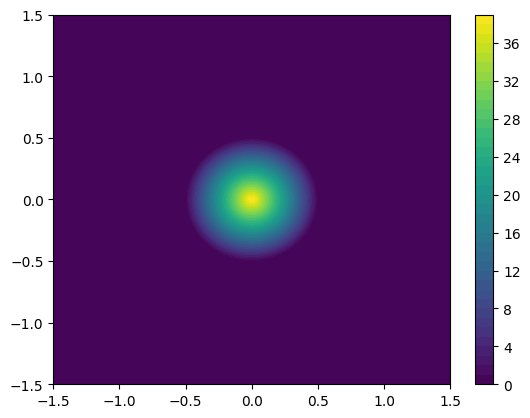

In [8]:
plt.contourf(X,Y,f(X,Y,C=C), levels=40)
plt.colorbar()
plt.show()

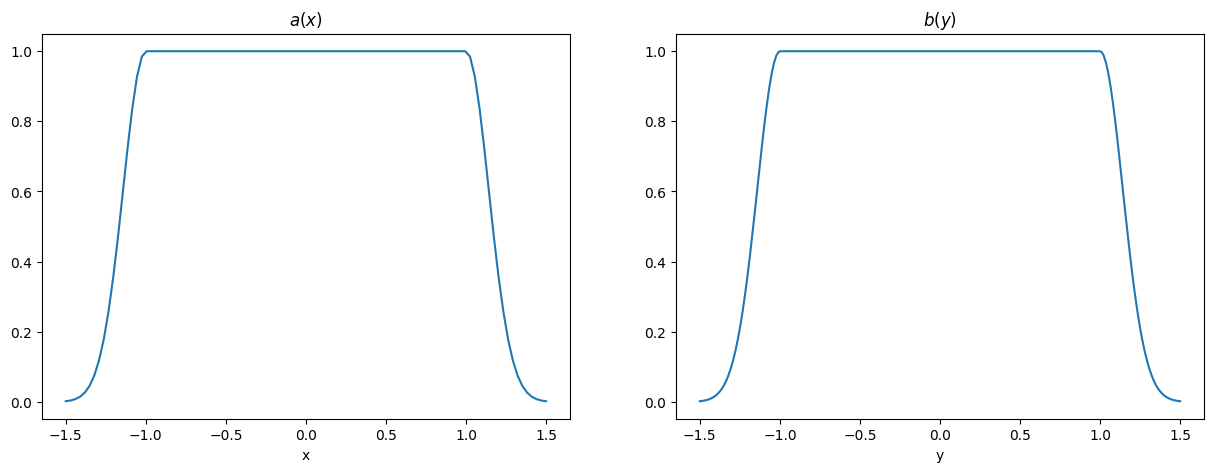

In [9]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].set_title('$a(x)$')
ax[0].plot(x,a(x,k_x=k_x))
ax[0].set_xlabel('x')

ax[1].set_title('$b(y)$')
ax[1].plot(y,b(y,k_y=k_y))
ax[1].set_xlabel('y')
plt.show()

In [45]:
np.exp(-20*0.5)

4.5399929762484854e-05

## i)

In [10]:
def _Tx(N, k_x):
    x = np.linspace(x_lim[0], x_lim[1], N+2)[1:-1]
    
    d1 = np.diag(a(x-h1/2, k_x=k_x)[1:],1)
    d2 = np.diag(a(x+h1/2, k_x=k_x)[:-1],-1)
    d3 = -np.diag(a(x+h1/2, k_x=k_x) + a(x-h1/2, k_x=k_x))
    return -(d1+d2+d3)/h1**2 

In [11]:
def _Ty(M, k_y):
    y = np.linspace(y_lim[0], y_lim[1], M+2)[1:-1]
    y = y[::-1]
    
    d1 = np.diag(b(y+h2/2, k_y=k_y)[1:],1) 
    d2 = np.diag(b(y-h2/2, k_y=k_y)[:-1],-1)
    d3 = -np.diag(b(y+h2/2, k_y=k_y) + b(y-h2/2, k_y=k_y)) 
    return -(d1+d2+d3)/h2**2

In [12]:
def _F(N,M,C):
    x = np.linspace(x_lim[0], x_lim[1], N+2)[1:-1]
    y = np.linspace(y_lim[0], y_lim[1], M+2)[1:-1]
    X,Y = np.meshgrid(x,y)
    return f(X,Y, C=C)[::-1]

In [13]:
def ABC(N, M, k_x, k_y, C):
    return _Ty(M, k_y), _Tx(N, k_x), _F(N, M, C)

In [14]:
Ty,Tx,F = ABC(N, M, k_x, k_y, C)

In [15]:
print(Tx.shape)
print(Ty.shape)
print(F.shape)

(100, 100)
(200, 200)
(200, 100)


In [16]:
F.shape

(200, 100)

In [17]:
F[::-1].shape

(200, 100)

In [18]:
U = scipy.linalg.solve_sylvester(Ty,Tx,F)

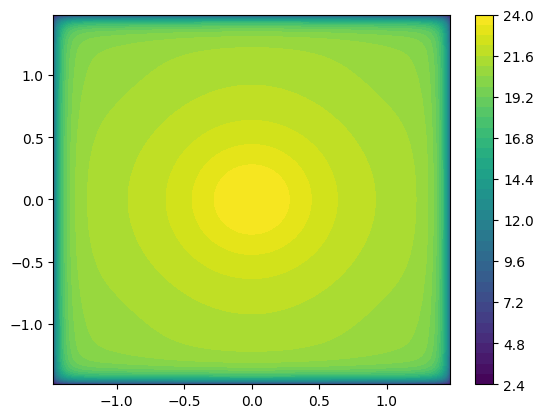

In [19]:
plt.contourf(X[1:-1,1:-1],Y[1:-1,1:-1],U, levels=40)
plt.colorbar()
plt.show()

## j)

In [27]:
Cs = [10, 20, 30]
sol1 = [scipy.linalg.solve_sylvester(*ABC(N, M, k_x, k_y, C_i)) for C_i in Cs]

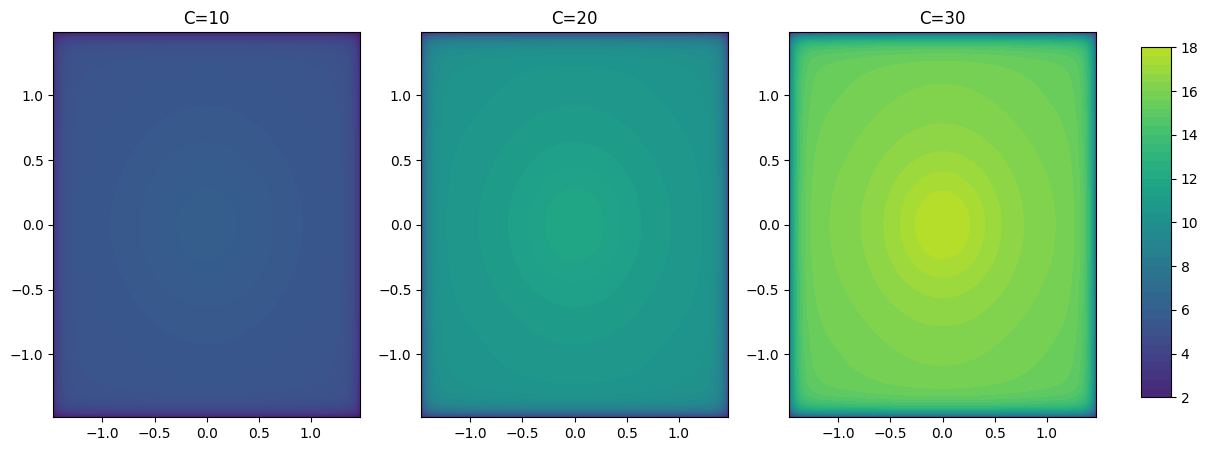

In [41]:
x = np.linspace(x_lim[0], x_lim[1], N+2)[1:-1]
y = np.linspace(y_lim[0], y_lim[1], M+2)[1:-1]
X,Y = np.meshgrid(x,y)

fig, axs = plt.subplots(1,3, figsize=(15,5))
for i, ax in enumerate(fig.axes):
    im = ax.contourf(X,Y,sol1[i], levels=40, vmin=0, vmax=20)
    ax.set_title(f'C={Cs[i]}')

fig.subplots_adjust(right=0.82)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
fig.colorbar(im, cax=cbar_ax)
plt.show()

Observamos que cuanto mayor los valores de $C$ (estufa), más calor hay en la solución estacionaría. Además, observamos simetría en la solución (concuerda con los datos introducidos).

Los resultados concuerdan con la interpretación física: a mayor valor de $C$, mayor valor del foco de calor en el centro de la sala y por tanto la solución estacionaria tambien será mayor.

## k)

In [22]:
C = 40
k = [0, 15, 20]

In [23]:
sol2 = [scipy.linalg.solve_sylvester(*ABC(N, M, k_x=ki, k_y=ki, C=C)) for ki in k]

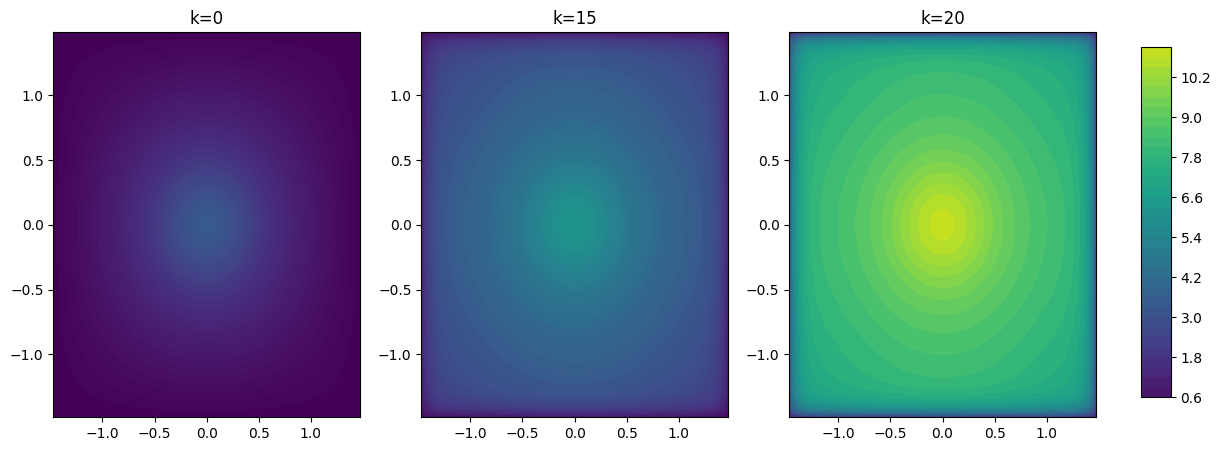

In [44]:
x = np.linspace(x_lim[0], x_lim[1], N+2)[1:-1]
y = np.linspace(y_lim[0], y_lim[1], M+2)[1:-1]
X,Y = np.meshgrid(x,y)

fig, axs = plt.subplots(1,3, figsize=(15,5))
for i, ax in enumerate(fig.axes):
    im = ax.contourf(X,Y,sol2[i], levels=40, vmin=0,vmax=12)
    ax.set_title(f'k={k[i]}')

fig.subplots_adjust(right=0.82)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
fig.colorbar(im, cax=cbar_ax)
plt.show()

El resultado muestra que los valores de $k$ afectan indirectamente el calor en la solución estacionaría. La explicación física sería que a menores valores de aislamiento, más influye la condición de Dirichlet de los bordes. En este caso tenemos condición de Dirichlet =0, entonces influye negativamente en la temperatura de la sala.

El caso $k_x=k_y=0$ nos da valores de $a(x)=b(y)=1$, entonces el aislamiento sería uniforme a lo largo de la sala. Además el aislamiento sería mucho menor que en los casos cuando $k_x,k_y>0$